# Introduction to data
Some define Statistics as the field that focuses on turning information into knowledge. The first step in that process is to summarize and describe the raw information - the data. In this lab, you will gain insight into public health by generating simple graphical and numerical summaries of a data set collected by the Centers for Disease Control and Prevention (CDC). As this is a large data set, along the way you’ll also learn the indispensable skills of data processing and subsetting.

Our first step is to import the necessary libraries.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Getting started
The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage. The BRFSS Web site (http://www.cdc.gov/brfss) contains a complete description of the survey, including the research questions that motivate the study and many interesting results derived from the data.

We will focus on a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 variables in this data set, we will work with a small subset.

We begin by loading the data set of 20,000 observations with the following command.

In [5]:
cdc = pd.read_csv('cdc.csv')

The data set `cdc` *data matrix*, with each row representing a *case* and each column representing a *variable*. pandas calls this data format a `DataFrame`, which is a term that will be used throughout the labs.

To view the names of the variables, type the command

In [3]:
cdc.columns

Index(['genhlth', 'exerany', 'hlthplan', 'smoke100', 'height', 'weight',
       'wtdesire', 'age', 'gender'],
      dtype='object')

This returns the names `genhlth`, `exerany`, `hlthplan`, `smoke100`, `height`, `weight`, `wtdesire`, `age`, and `gender`. Each one of these variables corresponds to a question that was asked in the survey. For example, for `genhlth`, respondents were asked to evaluate their general health, responding either excellent, very good, good, fair or poor. The `exerany` variable indicates whether the respondent exercised in the past month (1) or did not (0). Likewise, `hlthplan` indicates whether the respondent had some form of health coverage (1) or did not (0). The `smoke100` variable indicates whether the respondent had smoked at least 100 cigarettes in her lifetime. The other variables record the respondent’s `height` in inches,  `weight` in pounds as well as their desired weight, `wtdesire`, `age` in years, and `gender`.

**Excercise 1** How many cases are there in this data set? How many variables? For each variable, identify its data type (e.g. categorical, discrete).

We can have a look at the first few entries (rows) of our data with the command

In [5]:
cdc.head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f


and similarly we can look at the last few by typing

In [6]:
cdc.tail()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
19995,good,1,1,0,66,215,140,23,f
19996,excellent,0,1,0,73,200,185,35,m
19997,poor,0,1,0,65,216,150,57,f
19998,good,1,1,0,67,165,165,81,f
19999,good,1,1,1,69,170,165,83,m


You could also look at all of the data frame at once by typing its name into the console, but that might be unwise here. We know cdc has 20,000 rows, so viewing the entire data set would mean flooding your screen. It’s better to take small peeks at the data with head, tail or the subsetting techniques that you’ll learn in a moment.

# Summaries and tables
The BRFSS questionnaire is a massive trove of information. A good first step in any analysis is to distill all of that information into a few summary statistics and graphics. As a simple example, the function `describe` returns a numerical summary: count, mean, standard deviation, minimum first quartile, median, third quartile, and maximum. For `weight` this is

In [8]:
cdc['weight'].describe()

count    20000.00000
mean       169.68295
std         40.08097
min         68.00000
25%        140.00000
50%        165.00000
75%        190.00000
max        500.00000
Name: weight, dtype: float64

If you wanted to compute the interquartile range for the respondents’ weight, you would look at the output from the summary command above and then enter

In [9]:
190 - 140

50

When pandas computes the summary statistics, it many cases it is utilizing the function in a library called numpy. We can also utilize the functions in the library directly. By convention, we alias numpy as np when importing it.

In [10]:
import numpy as np

In [12]:
print(np.mean(cdc['weight']))
print(np.var(cdc['weight']))
print(np.median(cdc['weight']))

169.68295
1606.4038292975206
165.0


While it makes sense to describe a quantitative variable like `weight` in terms of these statistics, what about categorical data? We would instead consider the sample frequency or relative frequency distribution. The function `value_counts` does this for you by counting the number of times each kind of response was given. For example, to see the number of people who have smoked 100 cigarettes in their lifetime, type

In [13]:
cdc['smoke100'].value_counts()

0    10559
1     9441
Name: smoke100, dtype: int64

or instead look at the relative frequency distribution by typing

In [14]:
cdc['smoke100'].value_counts() / 20000

0    0.52795
1    0.47205
Name: smoke100, dtype: float64

Notice how python automatically divides all entries in the table by 20,000 in the command above. This is similar to something we observed in the Introduction to Python; when we multiplied or divided a vector with a number, python applied that action across entries in the vectors. Next, we make a bar plot of the value counts. While we could do this in matplotlib, we are going to use another library called seaborn to do some of the heavy lifting in matplotlib for us.

In [21]:
import seaborn as sns

Note that when we call value_counts it returns a Series. While, logically this is just a single list of values, it actually consists of two parts. The `index`, which in this case corresponds to the value of the `smoke100` variable and the `value` which in this case is the value count.

In [26]:
smoke = cdc['smoke100'].value_counts()
smoke.index

Int64Index([0, 1], dtype='int64')

In [28]:
smoke.values

array([10559,  9441], dtype=int64)

Using the parts of a series and seaborn, we can create our bar plot.

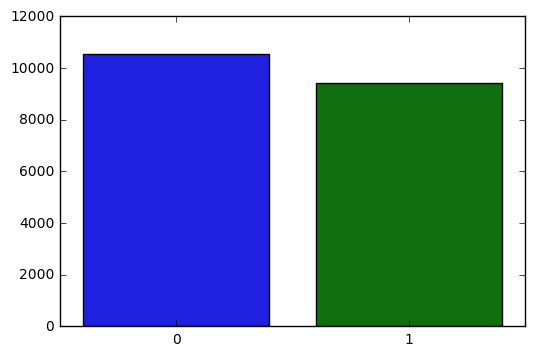

In [29]:
smoke = cdc['smoke100'].value_counts()
sns.barplot(x=smoke.index, y=smoke.values)
plt.show()

**Exercise 2** Create a numerical summary for `height` and `age`, and compute the interquartile range for each. Compute the relative frequency distribution for `gender` and `exerany`. How many males are in the sample? What proportion of the sample reports being in excellent health?

If we want to answer a question such as how many participants have smoked across each gender, we can use the group by functionality of pandas. The command below will group by `gender`, get the values of `smoke100` for each group, then compute the value counts.

In [58]:
cdc.groupby('gender')['smoke100'].value_counts()

gender  smoke100
f       0           6012
        1           4419
m       1           5022
        0           4547
Name: smoke100, dtype: int64

Data in this format can be used to create a mosaic plot. Again, instead of using matplotlib directly, we will use a library called statsmodels to help create the plot. Because we don't need to whole statsmodels library, we will import just the plot we need.

In [59]:
from statsmodels.graphics.mosaicplot import mosaic

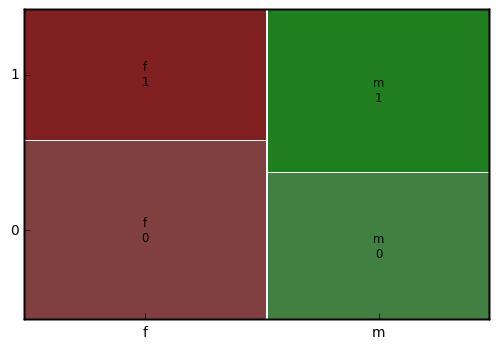

In [60]:
mosaic(cdc.groupby('gender')['smoke100'].value_counts())
plt.show()

We could have accomplished this in two steps by saving the value counts in one line and applying mosaic in the next (see the table/barplot example above).

**Exercise 3** What does the mosaic plot reveal about smoking habits and gender?

# Interlude: How pandas thinks about data
We mentioned that python stores data in data frames, which you might think of as a type of spreadsheet. Each row is a different observation (a different respondent) and each column is a different variable (the first is `genhlth`, the second `exerany` and so on). We can see the size of the data frame next to the object name in the workspace or we can type

In [61]:
cdc.shape

(20000, 9)

which will return the number of rows and columns. Now, if we want to access a subset of the full data frame (called slicing in python), we can use row-and-column notation. For example, to see the sixth variable of the 567th respondent, use the format

In [63]:
cdc.iloc[566,5]

160

which means we want the element of our data set that is in the 567th row (position 566 since indexing in python starts at 0) (meaning the 567th person or observation) and the 6th column (position 5) (in this case, weight). We know that `weight` is the 6th variable because it is the 6th entry in the list of variable names

In [64]:
cdc.columns

Index(['genhlth', 'exerany', 'hlthplan', 'smoke100', 'height', 'weight',
       'wtdesire', 'age', 'gender'],
      dtype='object')

To see the weights for the first 10 respondents we can type

In [67]:
cdc.iloc[0:10,6]

0    175
1    115
2    105
3    124
4    130
5    114
6    185
7    160
8    130
9    170
Name: wtdesire, dtype: int64

In this expression, we have asked just for rows in the range 1 through 10. python uses the : to create a range of values, so 0:9 expands to 0, 1, 2, 3, 4, 5, 6, 7, 8, 9. Note that ranges in python do not include the high value. You can see this by entering

In [86]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Finally, if we want all of the data for the first 10 respondents, type

In [74]:
cdc.iloc[0:10, ]

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
5,very good,1,1,0,64,114,114,55,f
6,very good,1,1,0,71,194,185,31,m
7,very good,0,1,0,67,170,160,45,m
8,good,0,1,1,65,150,130,27,f
9,good,1,1,0,70,180,170,44,m


By leaving out an index or a range (we didn’t type anything between the comma and the square bracket), we get all the columns. When starting out in python, this is a bit counterintuitive. As a rule, we omit the column number to see all columns in a data frame. Similarly, if we leave out an index or range for the rows, we would access all the observations, not just the 567th, or rows 1 through 10. Try the following to see the weights for all 20,000 respondents (note that this may take a long time to render in a Jupyter Notebook)

In [ ]:
cdc.iloc[:,5]

Recall that column 6 represents respondents’ weight, so the command above reported all of the weights in the data set. An alternative method to access the weight data is by referring to the name. Previously, we typed cdc.columns to see all the variables contained in the cdc data set. We can use any of the variable names to select items in our data set.

In [75]:
cdc['weight'].head()

0    175
1    125
2    105
3    132
4    150
Name: weight, dtype: int64

The square brackets tells python to look in data frame cdc for the column called weight. Since that’s a single vector, we can subset it with just a single index inside another set of square brackets. We see the weight for the 567th respondent by typing

In [76]:
cdc['weight'][566]

160

Similarly, for just the first 10 respondents

In [77]:
cdc['weight'][0:10]

0    175
1    125
2    105
3    132
4    150
5    114
6    194
7    170
8    150
9    180
Name: weight, dtype: int64

The command above returns the same result as the `cdc.iloc[0:10,5]` command. Both row-and-column notation and name notation are widely used, which one you choose to use depends on your personal preference.

# A little more on subsetting
It’s often useful to extract all individuals (cases) in a data set that have specific characteristics. We accomplish this through conditioning commands. First, consider expressions like

In [ ]:
cdc['gender'] == "m"

or

In [ ]:
cdc['age'] > 30

These commands produce a series of `True` and `False` values. There is one value for each respondent, where `True` indicates that the person was male (via the first command) or older than 30 (second command).

Suppose we want to extract just the data for the men in the sample, or just for those over 30. We can use the python selector syntax to do that for us. For example, the command

In [92]:
mdata = cdc[cdc['gender'] == "m"]

will create a new data set called `mdata` that contains only the men from the `cdc` data set. You can take a peek at the first several rows as usual

In [93]:
mdata.head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
6,very good,1,1,0,71,194,185,31,m
7,very good,0,1,0,67,170,160,45,m
9,good,1,1,0,70,180,170,44,m
10,excellent,1,1,1,69,186,175,46,m


This new data set contains all the same variables but just under half the rows. It is also possible to tell pandas to keep only specific variables, which is a topic we’ll discuss in a future lab. For now, the important thing is that we can carve up the data based on values of one or more variables.

As an aside, you can use several of these conditions together with `&` and `|`. The `&` is read “and” so that

In [95]:
m_and_over_30 = cdc[(cdc['gender'] == "m") & (cdc['age'] > 30)]

will give you the data for men over the age of 30. The `|` character is read “or” so that

In [97]:
m_and_over_30 = cdc[(cdc['gender'] == "m") | (cdc['age'] > 30)]

will take people who are men or over the age of 30 (why that’s an interesting group is hard to say, but right now the mechanics of this are the important thing). In principle, you may use as many “and” and “or” clauses as you like when forming a subset. When using pandas, the parenthases around each expression are important.

**Exercise 3** Create a new object called `under23_and_smoke` that contains all observations of respondents under the age of 23 that have smoked 100 cigarettes in their lifetime. Write the command you used to create the new object as the answer to this exercise.

In [99]:
under23_and_smoke = cdc[(cdc['smoke100'] == 1) & (cdc['age'] < 23)]

# Quantitative data
With our subsetting tools in hand, we’ll now return to the task of the day: making basic summaries of the BRFSS questionnaire. We’ve already looked at categorical data such as `smoke` and `gender` so now let’s turn our attention to quantitative data. Two common ways to visualize quantitative data are with box plots and histograms. We can construct a box plot for a single variable with the following command.

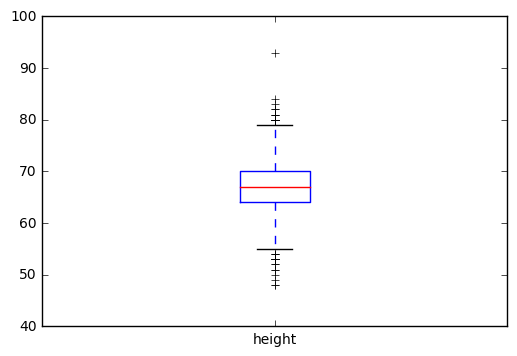

In [103]:
cdc['height'].plot.box()
plt.show()

You can compare the locations of the components of the box by examining the summary statistics.

In [104]:
cdc['height'].describe()

count    20000.000000
mean        67.182900
std          4.125954
min         48.000000
25%         64.000000
50%         67.000000
75%         70.000000
max         93.000000
Name: height, dtype: float64

Confirm that the median and upper and lower quartiles reported in the numerical summary match those in the graph. The purpose of a boxplot is to provide a thumbnail sketch of a variable for the purpose of comparing across several categories. So we can, for example, compare the heights of men and women with

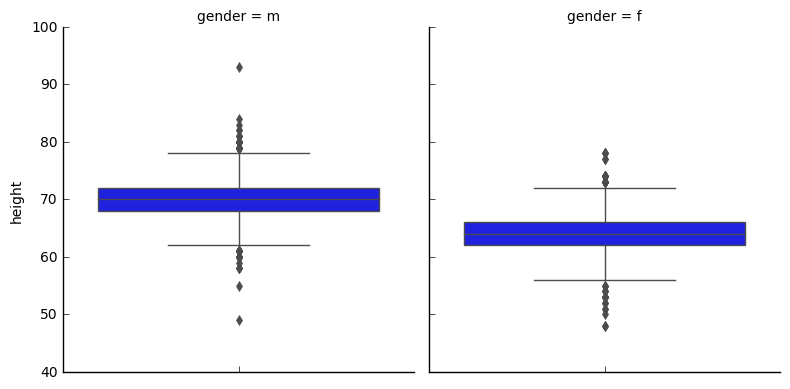

In [111]:
sns.factorplot(y='height', col = 'gender', kind='box', data=cdc)
plt.show()

Here we are using Seaborn function called `factorplot` that can plot quantitave data across one or more categories. The `kind` parameter specifies the kind of plot that we want.

Next let’s consider a new variable that doesn’t show up directly in this data set: Body Mass Index (BMI) (http://en.wikipedia.org/wiki/Body_mass_index). BMI is a weight to height ratio and can be calculated as:
$$BMI = \frac{weight~(lb)}{height~(in)^2} * 703$$
703 is the approximate conversion factor to change units from metric (meters and kilograms) to imperial (inches and pounds).

The following two lines first make a new object called `bmi` and then creates box plots of these values, defining groups by the variable `cdc['genhlth']`.

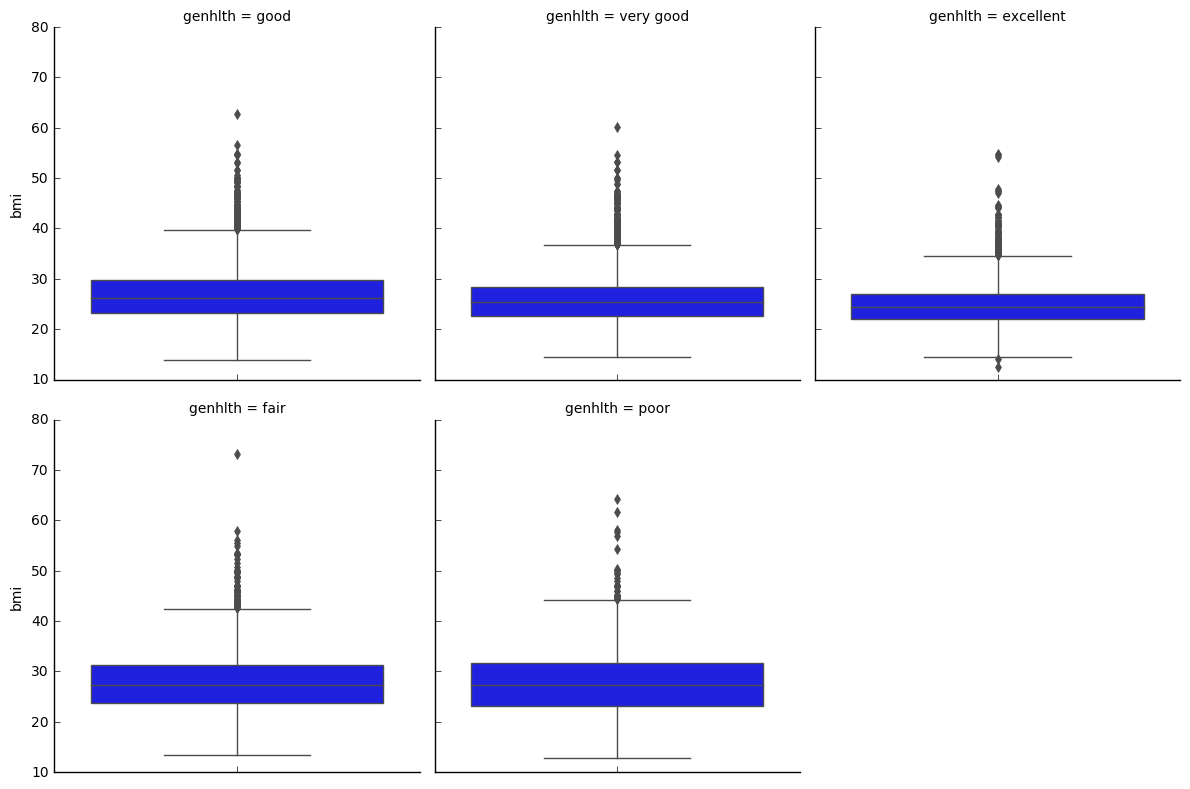

In [131]:
bmi = (cdc['weight'] / cdc['height'] **2) * 703
sns.factorplot(y='bmi', col = 'genhlth', kind='box', data=cdc.assign(bmi = bmi), col_wrap=3)
plt.show()

Notice that the first line above is just some arithmetic, but it’s applied to all 20,000 numbers in the cdc data set. That is, for each of the 20,000 participants, we take their weight, divide by their height-squared and then multiply by 703. The result is 20,000 BMI values, one for each respondent. This is one reason why we like python: it lets us perform computations like this using very simple expressions.
The next line uses `factorplot` again, but with a few changes. First, we are temporaily adding the `bmi` Series to the `cdc` DataFrame so that we can compare `bmi` and `genhlth` using the same data set. We are also setting the graphs to wrap after each sequence of 3 so they can be displayed in a larger format.

**Exercise 5** What does this box plot show? Pick another categorical variable from the data set and see how it relates to BMI. List the variable you chose, why you might think it would have a relationship to BMI, and indicate what the figure seems to suggest.

Finally, let’s make some histograms. We can look at the histogram for the age of our respondents with the command

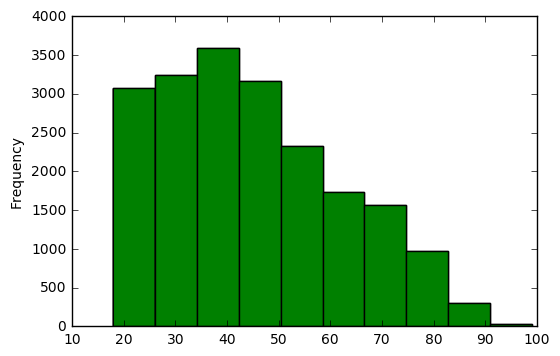

In [133]:
cdc['age'].plot.hist()
plt.show()

Histograms are generally a very good way to see the shape of a single distribution, but that shape can change depending on how the data is split between the different bins. You can control the number of bins by adding an argument to the command. In the next two lines, we first make a default histogram of bmi and then one with 50 bins.

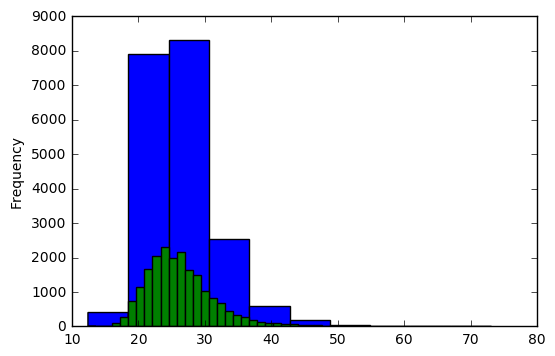

In [135]:
bmi.plot.hist()
bmi.plot.hist(bins=50)
plt.show()

pandas plots both histograms on the same figure. How do these two histograms compare?

At this point, we’ve done a good first pass at analyzing the information in the BRFSS questionnaire. We’ve found an interesting association between smoking and gender, and we can say something about the relationship between people’s assessment of their general health and their own BMI. We’ve also picked up essential computing tools – summary statistics, subsetting, and plots – that will serve us well throughout this course.

# On Your Own
1. Make a scatterplot of weight versus desired weight. Describe the relationship between these two variables.

2. Let’s consider a new variable: the difference between desired weight (wtdesire) and current weight (weight). Create this new variable by subtracting the two columns in the data frame and assigning them to a new object called wdiff.

3. What type of data is wdiff? If an observation wdiff is 0, what does this mean about the person’s weight and desired weight. What if  wdiff is positive or negative?

4. Describe the distribution of wdiff in terms of its center, shape, and spread, including any plots you use. What does this tell us about how people feel about their current weight?

5. Using numerical summaries and a side-by-side box plot, determine if men tend to view their weight differently than women.

6. Now it’s time to get creative. Find the mean and standard deviation of weight and determine what proportion of the weights are within one standard deviation of the mean.

*This notebook is based on the OpenIntro R lab [Introduction to data](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/intro_to_data/intro_to_data.html).*